In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# 1.Setup Environment

In [ ]:
"""Install NSL package"""
!pip install --upgrade neural_structured_learning

     |████████████████████████████████| 122kB 5.3MB/s 


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from neural_structured_learning.tools import graph_utils
import neural_structured_learning as nsl
import tensorflow_addons as tfa
from copy import deepcopy
import random
import os
import PIL

import time
from tqdm.auto import tqdm

tf.keras.backend.clear_session()
print("Version: ", tf.__version__)
print("keras", tf.keras.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.experimental.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.3.0
keras 2.4.0
Eager mode:  True
GPU is available


# 2.Generate Small Size of Image for tSNE representations

In [ ]:
'''import python file for graph data processing'''
from graph_data_processing import GraphDataProcess

In [ ]:
'''parse tfr files and plot images with 28*28*1'''
label_list = ['NonDemented', 'VeryMildDemented', 'MildDemented', 'ModerateDemented']
root_path = '/content/drive/My Drive/Projects/codes/graph_images/'
tfr_list = [f'{root_path}{label}.tfr' for label in label_list]
size=(50,50)
image_dataset = GraphDataProcess.parse_tfr_to_image_tensor(path_list=tfr_list[1:], 
                                                           batch_size=10, 
                                                           size=size,
                                                           channels=1,
                                                           shuffle=True)

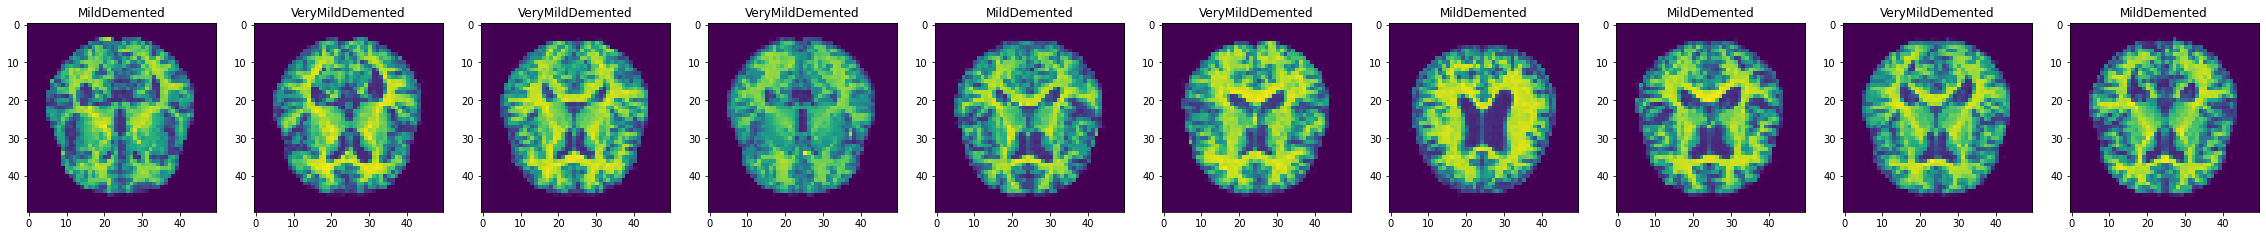

In [ ]:
dt=iter(image_dataset).get_next()
plt.figure(figsize=(40,50))
for img_index, img_tensor in enumerate(dt['image_tensor']):
    ax = plt.subplot(1, 10, img_index + 1)
    img_tensor = tf.reshape(img_tensor, shape=size)
    plt.imshow(img_tensor)
    plt.title(label_list[dt['label'].numpy()[img_index]])

# 3.Generate tSNE Represents

In [ ]:
'''define a CNN model'''
def build_model():
    ipt = tf.keras.Input(shape=(50, 50, 1), name='image_tensor')
    opt = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='valid', name='Cov2D_1')(ipt)
    opt = tf.keras.layers.LeakyReLU(name='Cov2D_1_leakyRelu')(opt)
    opt = tf.keras.layers.MaxPooling2D()(opt)
    opt = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='valid', name='Cov2D_2')(opt)
    opt = tf.keras.layers.LeakyReLU(name='Cov2D_2_leakyRelu')(opt)
    opt = tf.keras.layers.MaxPooling2D()(opt)
    opt = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='valid', name='Cov2D_3')(opt)
    opt = tf.keras.layers.LeakyReLU(name='Cov2D_3_leakyRelu')(opt)
    # opt = tf.keras.layers.MaxPooling2D()(opt)
    opt = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='valid', name='Cov2D_4')(opt)
    opt = tf.keras.layers.LeakyReLU(name='Cov2D_4_leakyRelu')(opt)
    # opt = tf.keras.layers.MaxPooling2D()(opt)
    opt = tf.keras.layers.Flatten()(opt)
    opt = tf.keras.layers.Dense(128)(opt)
    opt = tf.keras.layers.LeakyReLU(name='Dense_leakyRelu')(opt)
    opt = tf.keras.layers.Dense(2)(opt)
    model = tf.keras.models.Model(ipt, opt, name='cnn_model')
    return model

In [ ]:
'''generate tSNE rep for each label images'''
tfr_list = [f'{root_path}{label}.tfr' for label in label_list]
image_dataset_list = [GraphDataProcess.parse_tfr_to_image_tensor(path_list=path, batch_size=128, size=(50,50), channels=1, shuffle=False) for path in tfr_list]
lr=15
epochs=500
perplexity=40
model_list=[]
for data_index, data in enumerate(image_dataset_list):
    cnn_model = build_model()
    cnn_tsne = CNN_tSNE(perplexity=perplexity, cnn_model = model_list=[])
    history_CNN_loss, history_tSNE_loss, cnn_tsne_model = cnn_tsne.train_model_batch_tfr(x_train= image_dataset, epochs=epochs, tsne_lr=lr)
    model_list.append(cnn_tsne_model)

Note: sigmas binary searching starts in CPU computing: 
batch: 1



batch: 2



batch: 3



batch: 4



batch: 5



batch: 6



batch: 7



batch: 8



batch: 9



batch: 10



batch: 11



batch: 12



batch: 13



batch: 14



batch: 15



batch: 16



batch: 17



batch: 18



Note: cnn_tsne model training starts in GPU computing: 


/home/ky/anaconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:540: UserWarning: Input dict contained keys ['id', 'label'] which did not match any model input. They will be ignored by the model.
  warnings.warn(


epoch:   10, epoch_time: 0.70075, CNN_loss: 0.00022,  tSNE_loss: 0.00240
epoch:   20, epoch_time: 0.69813, CNN_loss: 0.00013,  tSNE_loss: 0.00211
epoch:   30, epoch_time: 0.70209, CNN_loss: 0.00015,  tSNE_loss: 0.00206
epoch:   40, epoch_time: 0.70313, CNN_loss: 0.00011,  tSNE_loss: 0.00191
epoch:   50, epoch_time: 0.70592, CNN_loss: 0.00015,  tSNE_loss: 0.00192
epoch:   60, epoch_time: 0.70237, CNN_loss: 0.00010,  tSNE_loss: 0.00179
epoch:   70, epoch_time: 0.69698, CNN_loss: 0.00010,  tSNE_loss: 0.00177
epoch:   80, epoch_time: 0.69935, CNN_loss: 0.00011,  tSNE_loss: 0.00177
epoch:   90, epoch_time: 0.69998, CNN_loss: 0.00019,  tSNE_loss: 0.00181
epoch:  100, epoch_time: 0.70100, CNN_loss: 0.00012,  tSNE_loss: 0.00174
epoch:  110, epoch_time: 0.70083, CNN_loss: 0.00013,  tSNE_loss: 0.00172
epoch:  120, epoch_time: 0.70440, CNN_loss: 0.00012,  tSNE_loss: 0.00171
epoch:  130, epoch_time: 0.70155, CNN_loss: 0.00013,  tSNE_loss: 0.00173
epoch:  140, epoch_time: 0.70518, CNN_loss: 0.00013


batch: 2



batch: 3



batch: 4



batch: 5



batch: 6



batch: 7



batch: 8



batch: 9



batch: 10



batch: 11



batch: 12



batch: 13



batch: 14



batch: 15



batch: 16



batch: 17



batch: 18



Note: cnn_tsne model training starts in GPU computing: 
epoch:   10, epoch_time: 0.70524, CNN_loss: 0.00021,  tSNE_loss: 0.00231
epoch:   20, epoch_time: 0.70246, CNN_loss: 0.00014,  tSNE_loss: 0.00213
epoch:   30, epoch_time: 0.70828, CNN_loss: 0.00016,  tSNE_loss: 0.00208
epoch:   40, epoch_time: 0.69958, CNN_loss: 0.00012,  tSNE_loss: 0.00189
epoch:   50, epoch_time: 0.70183, CNN_loss: 0.00012,  tSNE_loss: 0.00187
epoch:   60, epoch_time: 0.70456, CNN_loss: 0.00015,  tSNE_loss: 0.00189
epoch:   70, epoch_time: 0.70631, CNN_loss: 0.00013,  tSNE_loss: 0.00179
epoch:   80, epoch_time: 0.70347, CNN_loss: 0.00013,  tSNE_loss: 0.00179
epoch:   90, epoch_time: 0.70508, CNN_loss: 0.00013,  tSNE_loss: 0.00179
epoch:  100, epoch_time: 0.71090, CNN_loss: 0.00012,  tSNE_loss: 0.00172
epoch:  110, epoch_time: 0.70358, CNN_loss: 0.00011,  tSNE_loss: 0.00170
epoch:  120, epoch_time: 0.70417, CNN_loss: 0.00012,  tSNE_loss: 0.00169
epoch:  130, epoch_time: 0.71199, CNN_loss: 0.00014,  tSNE_loss: 0.


batch: 2



batch: 3



batch: 4



batch: 5



batch: 6



batch: 7



batch: 8



batch: 9



batch: 10



batch: 11



batch: 12



batch: 13



batch: 14



batch: 15



batch: 16



batch: 17



batch: 18



Note: cnn_tsne model training starts in GPU computing: 
epoch:   10, epoch_time: 0.70737, CNN_loss: 0.00026,  tSNE_loss: 0.00246
epoch:   20, epoch_time: 0.69951, CNN_loss: 0.00015,  tSNE_loss: 0.00215
epoch:   30, epoch_time: 0.69825, CNN_loss: 0.00016,  tSNE_loss: 0.00206
epoch:   40, epoch_time: 0.70207, CNN_loss: 0.00015,  tSNE_loss: 0.00202
epoch:   50, epoch_time: 0.70978, CNN_loss: 0.00013,  tSNE_loss: 0.00191
epoch:   60, epoch_time: 0.70395, CNN_loss: 0.00014,  tSNE_loss: 0.00186
epoch:   70, epoch_time: 0.70299, CNN_loss: 0.00013,  tSNE_loss: 0.00183
epoch:   80, epoch_time: 0.70622, CNN_loss: 0.00013,  tSNE_loss: 0.00181
epoch:   90, epoch_time: 0.70624, CNN_loss: 0.00014,  tSNE_loss: 0.00181
epoch:  100, epoch_time: 0.70114, CNN_loss: 0.00013,  tSNE_loss: 0.00174
epoch:  110, epoch_time: 0.70476, CNN_loss: 0.00015,  tSNE_loss: 0.00176
epoch:  120, epoch_time: 0.70800, CNN_loss: 0.00012,  tSNE_loss: 0.00172
epoch:  130, epoch_time: 0.70651, CNN_loss: 0.00013,  tSNE_loss: 0.


batch: 2



batch: 3



batch: 4



batch: 5



batch: 6



batch: 7



batch: 8



batch: 9



batch: 10



batch: 11



batch: 12



batch: 13



batch: 14



batch: 15



batch: 16



batch: 17



batch: 18



Note: cnn_tsne model training starts in GPU computing: 
epoch:   10, epoch_time: 0.70291, CNN_loss: 0.00021,  tSNE_loss: 0.00233
epoch:   20, epoch_time: 0.70399, CNN_loss: 0.00013,  tSNE_loss: 0.00208
epoch:   30, epoch_time: 0.70421, CNN_loss: 0.00018,  tSNE_loss: 0.00217
epoch:   40, epoch_time: 0.70619, CNN_loss: 0.00013,  tSNE_loss: 0.00193
epoch:   50, epoch_time: 0.70098, CNN_loss: 0.00012,  tSNE_loss: 0.00187
epoch:   60, epoch_time: 0.71193, CNN_loss: 0.00014,  tSNE_loss: 0.00185
epoch:   70, epoch_time: 0.70052, CNN_loss: 0.00015,  tSNE_loss: 0.00183
epoch:   80, epoch_time: 0.70236, CNN_loss: 0.00015,  tSNE_loss: 0.00185
epoch:   90, epoch_time: 0.70404, CNN_loss: 0.00015,  tSNE_loss: 0.00182
epoch:  100, epoch_time: 0.70467, CNN_loss: 0.00012,  tSNE_loss: 0.00176
epoch:  110, epoch_time: 0.70501, CNN_loss: 0.00014,  tSNE_loss: 0.00175
epoch:  120, epoch_time: 0.70099, CNN_loss: 0.00012,  tSNE_loss: 0.00171
epoch:  130, epoch_time: 0.70274, CNN_loss: 0.00013,  tSNE_loss: 0.

<ipython-input-109-4b305cddf444>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,4,model_index+1)


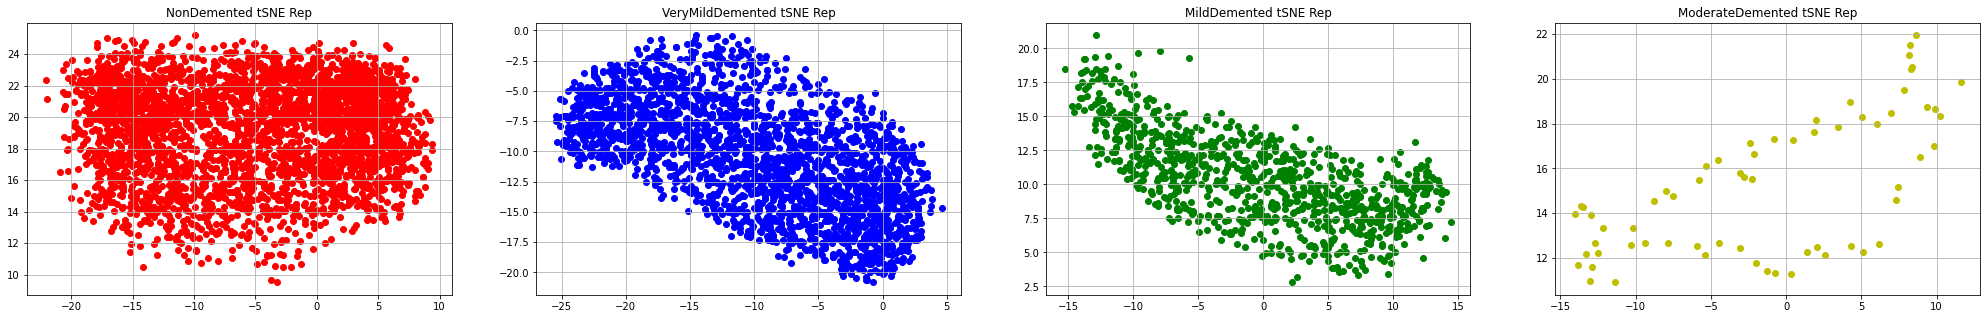

In [ ]:
'''plot tSNE representations'''
plt.figure(figsize=(35,5))
for model_index, model in enumerate(model_list):
    c_lst=['r','b','g','y']
    for index, batch in enumerate(image_dataset_list[model_index]):
        image_tensors = batch['image_tensor']
        image_rep = model(image_tensors)
        plt.subplot(1,4,model_index+1)
        plt.scatter(image_rep[:,0], image_rep[:,1], c = c_lst[model_index], cmap='brg')
    plt.title(f'{label_list[model_index]} tSNE Rep')
    plt.grid()

In [ ]:
'''save cnn_models'''
for index, model in enumerate(model_list):
    model.save(f'{root_path}{label_list[index]}_tsne_cnn_model.h5')

In [ ]:
'''generate t-SNE representation tfr'''
img_size=(50,50)
tsne_model_path_list = [f'{root_path}{label}_tsne_cnn_model.h5' for label in label_list]
model_list=[tf.keras.models.load_model(path) for path in tsne_model_path_list]
tfr_list = [f'{root_path}{label}.tfr' for label in label_list]
tfr_rep_list_tsne = [f'{root_path}{label}_tSNErep.tfr' for label in label_list]
img_data_list = [GraphDataProcess.parse_tfr_to_image_tensor(path_list=[tfr_path], batch_size=1, size=img_size, channels=1, shuffle=False) for tfr_path in tfr_list]

# GraphDataProcess.generate_tfr_tsne_represent(image_dataset_list=img_data_list, cnn_tsne_model_list= model_list, tfr_list=tfr_rep_list_tsne)

In [ ]:
'''parse t-SNE representation'''
tfr_list = [f'{root_path}{label}.tfr' for label in label_list]
# img_data = GraphDataProcess.parse_tfr_to_image_rep(path_list= tfr_rep_list_tsne, rep_dim= 2, batch_size= 100, shuffle= False)
iter(img_data).get_next()

{'id': <tf.Tensor: shape=(100,), dtype=string, numpy=
 array([b'0_414', b'0_3026', b'0_80', b'0_858', b'0_2804', b'0_2043',
        b'0_3067', b'0_1205', b'0_763', b'0_2237', b'0_2058', b'0_35',
        b'0_1231', b'0_1084', b'0_1671', b'0_1427', b'0_2394', b'0_885',
        b'0_1915', b'0_2910', b'0_1370', b'0_130', b'0_1460', b'0_1814',
        b'0_2250', b'0_1220', b'0_2729', b'0_966', b'0_1164', b'0_1846',
        b'0_1986', b'0_2653', b'0_2988', b'0_3139', b'0_1546', b'0_2108',
        b'0_304', b'0_586', b'0_1237', b'0_2856', b'0_1014', b'0_2073',
        b'0_2947', b'0_2175', b'0_3032', b'0_3048', b'0_951', b'0_1197',
        b'0_1071', b'0_217', b'0_583', b'0_116', b'0_2783', b'0_2525',
        b'0_1643', b'0_1512', b'0_257', b'0_2196', b'0_1464', b'0_3024',
        b'0_2712', b'0_2256', b'0_2471', b'0_1290', b'0_1083', b'0_1322',
        b'0_2202', b'0_2228', b'0_2696', b'0_1333', b'0_2347', b'0_286',
        b'0_1325', b'0_1079', b'0_1170', b'0_2226', b'0_429', b'0_934',
    

# 4.Generate Graph Data

## Generate the graph data without any cluster algorithms

In [ ]:
'''generate graphs without clustering'''
tfr_list = [f'{root_path}{label}.tfr' for label in label_list]
tfr_rep_list_tsne = [f'{root_path}{label}_tSNErep.tfr' for label in label_list]
tsv_graph_list = [f'{root_path}{label}_graph_no_cluster.tsv' for label in label_list]

cosine_similarity_threshold=0.95
# generate graph without cluster
for path_index, path in enumerate(tfr_rep_list_tsne):
    nsl.tools.build_graph(embedding_files = [path], 
                          output_graph_path = tsv_graph_list[path_index], 
                          similarity_threshold= cosine_similarity_threshold,
                          id_feature_name='id', 
                          embedding_feature_name='representation')

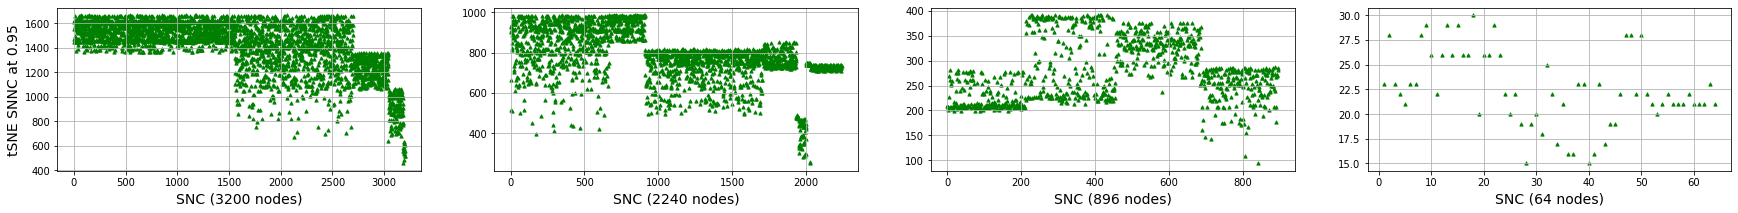

In [ ]:
"""plot the count of neighbour nodes of each seed node"""
plt.figure(figsize=(30,3))
for index, path in enumerate(tsv_graph_list):
    graph = nsl.tools.read_tsv_graph(path)
    nbr_count=[]
    for key in graph.keys():
        nbr_count.append(len(graph[f'{key}'].keys()))

    plt.subplot(1, 4, index + 1)
    plt.scatter(np.linspace(1,len(nbr_count), len(nbr_count)),nbr_count, s=10, c='g', marker='^')
    plt.xlabel(f'SNC ({len(graph.keys())} nodes)', fontsize = 14)
    if index==0:
      plt.ylabel('tSNE SNNC at 0.95', fontsize=14)
    # title = f'"{label_list[index]}"'
    # plt.title(title)
    plt.grid()

In [ ]:
'''generate complete graph without clusters'''
tsv_graph_list = [f'{root_path}{label}_graph_no_cluster.tsv' for label in label_list]
file_output_path = f'{root_path}AD_graph_tSNE_no_cluster.tsv'
all_cluster_edges_list=[]
for path_index, path in enumerate(tsv_graph_list[1:]):
  cluster_graph = nsl.tools.read_tsv_graph(path)
  for item in cluster_graph.items():
      for item_II in item[1].items():
          edge_item = [item[0], item_II[0], item_II[1]]
          all_cluster_edges_list.append(edge_item)
# merge all cluster graphs into base centroid graph
complete_graph = nsl.tools.read_tsv_graph(tsv_graph_list[0])
for edge in all_cluster_edges_list:
    nsl.tools.add_edge(complete_graph, edge)
# save graph data into .tsv file
if file_output_path:
    nsl.tools.write_tsv_graph(filename=file_output_path, graph=complete_graph)

## Generate Graphs with Kmeans Clustering

In [ ]:
from Kmeans import KMeans, KMeansModels

In [ ]:
'''load image represents data for K value searching for each label images'''
tfr_list = [f'{root_path}{label}.tfr' for label in label_list]
tfr_rep_list_tsne = [f'{root_path}{label}_tSNErep.tfr' for label in label_list]
img_rep_data_list = [GraphDataProcess.parse_tfr_to_image_rep(path_list=[path], rep_dim=2, batch_size=3500, shuffle=False) for path in tfr_rep_list_tsne]
iter(img_rep_data_list[0]).get_next()

{'id': <tf.Tensor: shape=(3200,), dtype=string, numpy=
 array([b'0_414', b'0_3026', b'0_80', ..., b'0_485', b'0_1462', b'0_2682'],
       dtype=object)>,
 'label': <tf.Tensor: shape=(3200,), dtype=int64, numpy=array([0, 0, 0, ..., 0, 0, 0])>,
 'representation': <tf.Tensor: shape=(3200, 2), dtype=float32, numpy=
 array([[ -0.26988167,  15.958082  ],
        [  2.7536438 ,  22.275011  ],
        [-14.574106  ,  22.881561  ],
        ...,
        [-11.599275  ,  18.39426   ],
        [-14.149674  ,  19.15685   ],
        [ -1.6575748 ,  22.183104  ]], dtype=float32)>}

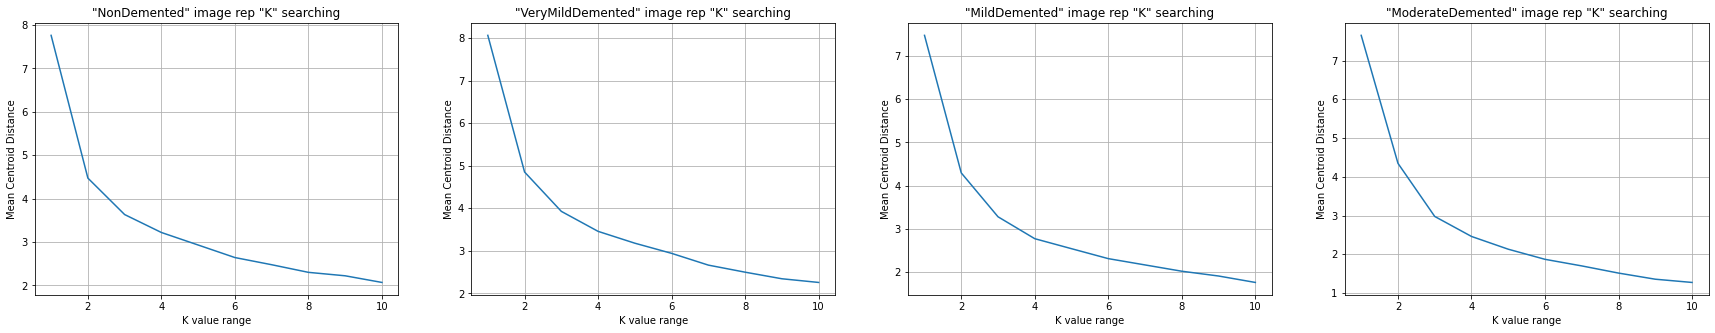

In [ ]:
'''searching K value for each label data'''
K_limit=10
epoch_per_K=20
plt.figure(figsize=(30,5))
for data_index, data in enumerate(img_rep_data_list):
    data_rep = iter(data).get_next()['representation']
    kmeans = KMeans(data=data_rep, K=1)
    kmeans.set_centroids(optimize=True)
    
    c_means_clc, K_limit = kmeans.searching_K(K_limit=K_limit, epoch_per_K=epoch_per_K, verbose=0)
    
    plt.subplot(1, 4, data_index + 1)
    plt.plot(np.linspace(1, K_limit, K_limit), c_means_clc)
    title = f'"{label_list[data_index]}" image rep "K" searching'
    plt.title(title)
    plt.xlabel('K value range')
    plt.ylabel('Mean Centroid Distance')
    plt.grid()

In [ ]:
"""generate K_means models for each label data"""
batch= 1000
rep_dim= 2
K_value_list = [4,4,4,5] # for both train and test data
epoch= 30
tfr_rep_list = [f'{root_path}{label}_VAErep.tfr' for label in label_list]
Kmeans_model_list = KMeansModels.generate_model_list(path_list = tfr_rep_list_tsne, rep_dim=rep_dim, K_list=K_value_list, epoch=epoch, batch=batch)


====================== Model 0 training ======================

epoch:  1 ,centroid mean:  3.3498867
epoch:  2 ,centroid mean:  4.7504597
epoch:  3 ,centroid mean:  5.0220895
epoch:  4 ,centroid mean:  5.1708355
epoch:  5 ,centroid mean:  5.2894297
epoch:  6 ,centroid mean:  5.404427
epoch:  7 ,centroid mean:  5.5020704
epoch:  8 ,centroid mean:  5.5814686
epoch:  9 ,centroid mean:  5.650861
epoch:  10 ,centroid mean:  5.706905
epoch:  11 ,centroid mean:  5.746089
epoch:  12 ,centroid mean:  5.780798
epoch:  13 ,centroid mean:  5.8205404
epoch:  14 ,centroid mean:  5.8457575
epoch:  15 ,centroid mean:  5.860481
epoch:  16 ,centroid mean:  5.868073
epoch:  17 ,centroid mean:  5.8905478
epoch:  18 ,centroid mean:  5.90429
epoch:  19 ,centroid mean:  5.9334817
epoch:  20 ,centroid mean:  5.9427633
epoch:  21 ,centroid mean:  5.949803
epoch:  22 ,centroid mean:  5.949803
epoch:  23 ,centroid mean:  5.949803
epoch:  24 ,centroid mean:  5.949803
epoch:  25 ,centroid mean:  5.949803
epoch:  

In [ ]:
"""generate NonDemented Image Rep graph with clusters"""
tfr_rep_list_tsne = [f'{root_path}{label}_tSNErep.tfr' for label in label_list]
graph = GraphDataProcess.generate_single_graph_with_cluster(data_tfr_rep_path=tfr_rep_list_tsne[0], 
                                                           represent_dim = 2, 
                                                           id_prefix = 0, 
                                                           KMeans_model = Kmeans_model_list[0],
                                                           file_output_path=f'{root_path}NonDemented_graph_with_cluster.tsv', 
                                                           similarity_threshold=0.95)
print('Total seed nodes: ',len(graph.keys()))
graph

In [ ]:
'''generate all AD image into one graph with clustering'''
tfr_rep_list_tsne = [f'{root_path}{label}_tSNErep.tfr' for label in label_list]
complete_graph = GraphDataProcess.generate_complete_graph_with_cluster(tfr_path_list= tfr_rep_list_tsne,
                                                                       prefix_list= [0,1,2,3], 
                                                                       model_list= Kmeans_model_list, 
                                                                       represent_dim= 2, 
                                                                       file_output_path= f'{root_path}AD_graph_tSNE_KMeans.tsv',
                                                                       similarity_threshold=0.95)
complete_graph

In [ ]:
complete_graph.keys()

## Generate Image Graphs with Hierarcichal clustering

In [ ]:
from Hierarchical import Hierchaical, HierchaicalModels

In [ ]:
'''load the VAErep path list'''
K_value_list = [12,11,11,5]
tfr_rep_list = [f'{root_path}{label}_tSNErep.tfr' for label in label_list]

'''train hierarchical models in a list'''
model_list = HierchaicalModels.generate_model_list(path_list=tfr_rep_list, rep_dim=2, cluster_num_list= K_value_list, batch=5000)
model_list


====================== Model 0 training ======================

Done...

====================== Model 1 training ======================

Done...

====================== Model 2 training ======================

Done...

====================== Model 3 training ======================

Done...


In [ ]:
'''print the cluster length of each label'''
for model_index, model in enumerate(model_list):
    clusters, cluster_length = model.get_clusters()
    print(f'{label_list[model_index]} model clusters length:\n{cluster_length}')

NonDemented model clusters length:
[179, 491, 364, 228, 327, 254, 247, 115, 312, 264, 246, 173]
VeryMildDemented model clusters length:
[217, 292, 234, 201, 166, 169, 192, 198, 280, 137, 154]
MildDemented model clusters length:
[76, 129, 120, 45, 97, 70, 71, 66, 65, 85, 72]
ModerateDemented model clusters length:
[14, 12, 12, 18, 8]


In [ ]:
'''generate complete graph with hierachical clusters'''
final_graph = GraphDataProcess.generate_complete_graph_with_cluster_hierarch(tfr_rep_path_list=tfr_rep_list, 
                                                                             prefix_list=[0,1,2,3], 
                                                                             model_list=model_list, 
                                                                             represent_dim=2,
                                                                             file_output_path=f'{root_path}AD_graph_tSNE_Hierarchy.tsv',
                                                                             similarity_threshold = 0.95)

In [ ]:
final_graph

Output hidden; open in https://colab.research.google.com to view.

# 5.Generate Train & Test Data

In [ ]:
NBR_FEATURE_PREFIX = 'NL_nbr_'
NBR_WEIGHT_SUFFIX = '_weight'
'''import python file for NSL data format processing'''
from nsl_data_processing import GenerateTrainTestDict, NSLDataFormat

In [ ]:
'''generate train and test examples from AD images'''
path_list = [f'{root_path}{label}/' for label in label_list]
train_examples, test_examples = GenerateTrainTestDict.get_train_test_dict(path_list=path_list, train_percentage=0.7)
print('train examples: ', len(train_examples.keys()))
print('test examples', len(test_examples.keys()))

train examples:  4489
test examples 1921


## Generate train graph data without any cluster algorithms

In [ ]:
'''merge train examples with the graph_without_clusters'''
train_tfr_path = f'{root_path}train_data.tfr'
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_tSNE_no_cluster.tsv')
max_seed_node_neighbours = 5

nsl_train= NSLDataFormat(seed_dict_examples=train_examples, 
                         rem_dict_examples=test_examples, 
                         graph=graph, 
                         max_nbrs=max_seed_node_neighbours)
nsl_train.generate_node_nbrs_tfr(output_file_path=train_tfr_path)

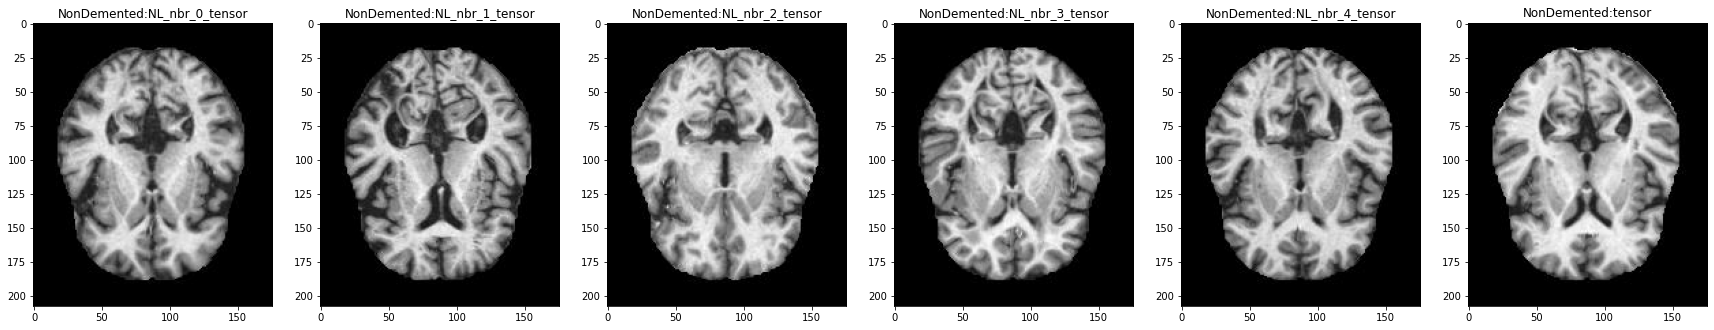

In [ ]:
'''parse train_graph_examples without clusters'''
parsed_image_size=(208,176)
parsed_image_channel=3
batch=1
train_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[train_tfr_path],
                                                   batch_size=batch,
                                                   max_neighbor_number=max_seed_node_neighbours,
                                                   image_size=parsed_image_size,
                                                   image_channels=parsed_image_channel,
                                                   shuffle=True)
data_sample = iter(train_image_dataset).get_next()
'''plot parsed train_graph examples without clusters'''
label =  tf.argmax(data_sample[1], axis=0)
sample = data_sample[0]
img_index=0
plt.figure(figsize=(30,10))
for key, value in sample.items():
    if key.split('_')[-1]=='tensor':
        plt.subplot(1,max_seed_node_neighbours+1,img_index + 1)
        img_tensor = tf.reshape(value, shape=value.shape[1:])
        plt.imshow(img_tensor)
        plt.title(f'{label_list[label.numpy()[0]]}:{key}')
        img_index +=1

## Generate test graph data without any cluster algorithms

In [ ]:
'''merge test examples without clusters'''
test_tfr_path = f'{root_path}test_data.tfr'
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_tSNE_no_cluster.tsv')
max_seed_node_neighbours = 5

nsl_test= NSLDataFormat(seed_dict_examples=test_examples, 
                         rem_dict_examples=train_examples, 
                         graph=graph, 
                         max_nbrs=max_seed_node_neighbours)
nsl_test.generate_node_nbrs_tfr(output_file_path=test_tfr_path)

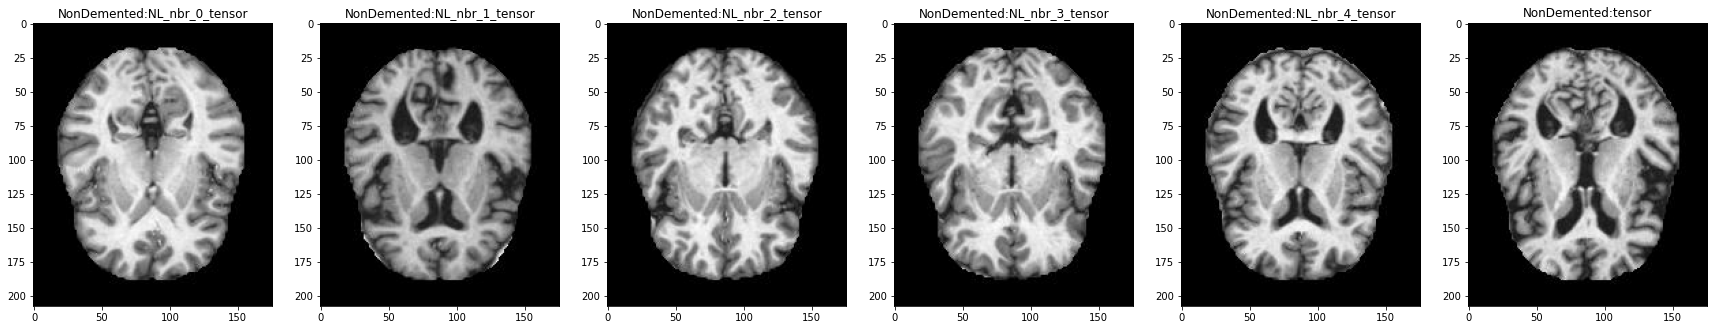

In [ ]:
'''parse test_graph_examples'''
parsed_image_size=(208,176)
parsed_image_channel=3
batch=1
train_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[test_tfr_path],
                                                   batch_size=batch,
                                                   max_neighbor_number=max_seed_node_neighbours,
                                                   image_size=parsed_image_size,
                                                   image_channels=parsed_image_channel,
                                                   shuffle=True)
data_sample = iter(train_image_dataset).get_next()
'''plot parsed test_graph examples with examples'''
label = tf.argmax(data_sample[1], axis=0)
sample = data_sample[0]
img_index=0
plt.figure(figsize=(30,10))
for key, value in sample.items():
    if key.split('_')[-1]=='tensor':
        plt.subplot(1,max_seed_node_neighbours+1,img_index + 1)
        img_tensor = tf.reshape(value, shape=value.shape[1:])
        plt.imshow(img_tensor)
        plt.title(f'{label_list[label.numpy()[0]]}:{key}')
        img_index +=1

## Generate the train graph data with Hierarchical clusters

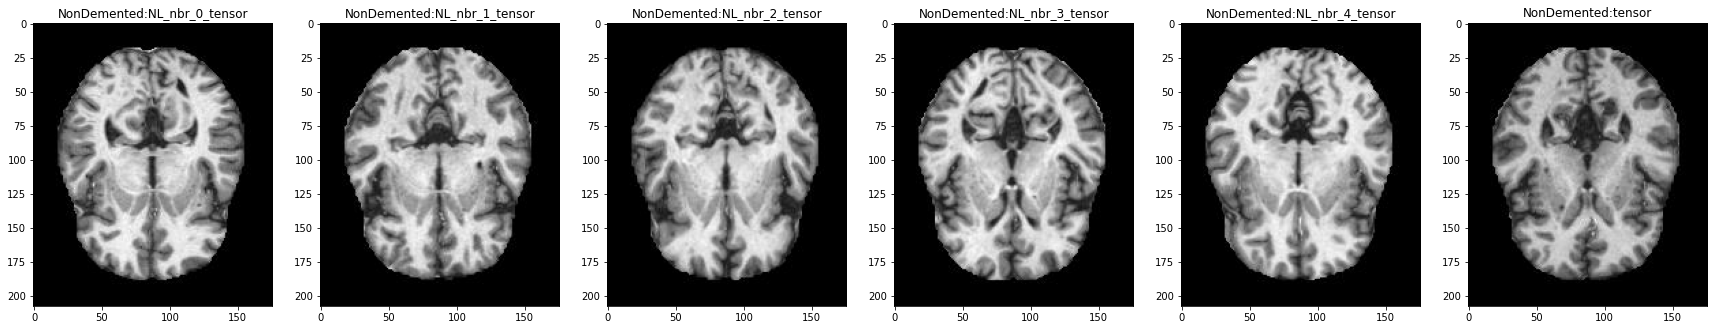

In [ ]:
'''merge train examples with the graph ( hierarchical clusters)'''
train_tfr_path = f'{root_path}train_data.tfr'
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_tSNE_Hierarchy.tsv')
max_seed_node_neighbours = 5

nsl_train= NSLDataFormat(seed_dict_examples=train_examples, 
                         rem_dict_examples=test_examples, 
                         graph=graph, 
                         max_nbrs=max_seed_node_neighbours)
nsl_train.generate_node_nbrs_tfr(output_file_path=train_tfr_path)

'''parse train_graph_examples with clusters'''
parsed_image_size=(208,176)
parsed_image_channel=3
batch=1
train_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[train_tfr_path],
                                                   batch_size=batch,
                                                   max_neighbor_number=max_seed_node_neighbours,
                                                   image_size=parsed_image_size,
                                                   image_channels=parsed_image_channel,
                                                   shuffle=True)
data_sample = iter(train_image_dataset).get_next()

'''plot parsed train_graph examples with clusters'''
label =  tf.argmax(data_sample[1], axis=0)
sample = data_sample[0]
img_index=0
plt.figure(figsize=(30,10))
for key, value in sample.items():
    if key.split('_')[-1]=='tensor':
        plt.subplot(1,max_seed_node_neighbours+1,img_index + 1)
        img_tensor = tf.reshape(value, shape=value.shape[1:])
        plt.imshow(img_tensor)
        plt.title(f'{label_list[label.numpy()[0]]}:{key}')
        img_index +=1

## Generate the test graph data with Hierarchical clusters

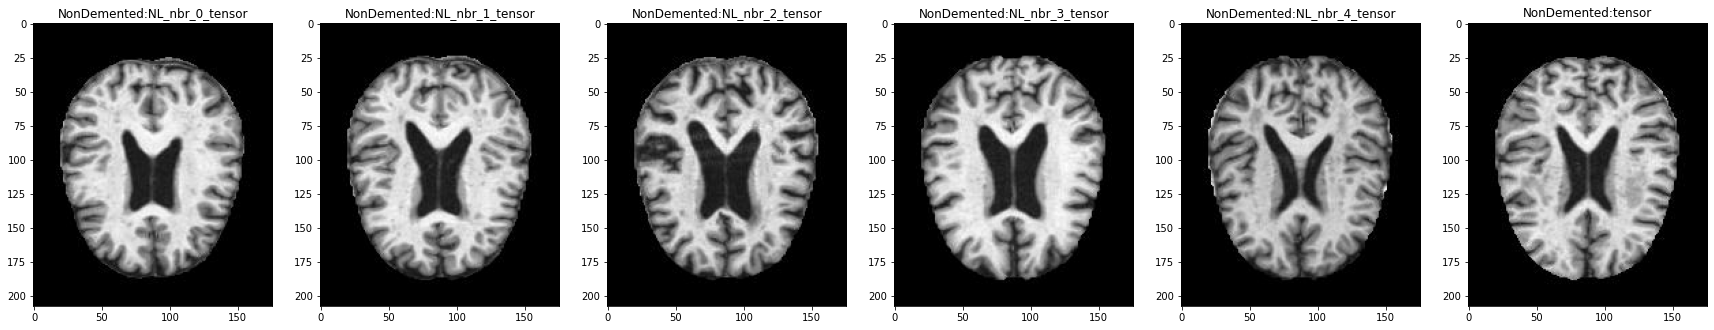

In [ ]:
'''merge test examples with the graph clusters'''
test_tfr_path = f'{root_path}test_data.tfr'
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_tSNE_Hierarchy.tsv')
max_seed_node_neighbours = 5

nsl_train= NSLDataFormat(seed_dict_examples=test_examples, 
                         rem_dict_examples=train_examples, 
                         graph=graph, 
                         max_nbrs=max_seed_node_neighbours)
nsl_train.generate_node_nbrs_tfr(output_file_path=test_tfr_path)
'''parse test_graph_examples with clusters'''
parsed_image_size=(208,176)
parsed_image_channel=3
batch=1
test_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[test_tfr_path],
                                                         batch_size=batch,
                                                         max_neighbor_number=max_seed_node_neighbours,
                                                         image_size=parsed_image_size,
                                                         image_channels=parsed_image_channel,
                                                         shuffle=True)
data_sample = iter(test_image_dataset).get_next()
'''plot parsed train_graph examples with clusters'''
label =  tf.argmax(data_sample[1], axis=0)
sample = data_sample[0]
img_index=0
plt.figure(figsize=(30,10))
for key, value in sample.items():
    if key.split('_')[-1]=='tensor':
        plt.subplot(1,max_seed_node_neighbours+1,img_index + 1)
        img_tensor = tf.reshape(value, shape=value.shape[1:])
        plt.imshow(img_tensor)
        plt.title(f'{label_list[label.numpy()[0]]}:{key}')
        img_index +=1

## Generate the train graph data with KMeans clusters

In [ ]:
'''merge train examples with the graph with cluster'''
train_tfr_path = f'{root_path}train_data_tsne.tfr'
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_tSNE_KMeans.tsv')
max_seed_node_neighbours = 5
nsl_train= NSLDataFormat(seed_dict_examples=train_examples, 
                         rem_dict_examples=test_examples, 
                         graph=graph, 
                         max_nbrs=max_seed_node_neighbours)
nsl_train.generate_node_nbrs_tfr(output_file_path=train_tfr_path)

In [ ]:

'''parse train_graph_examples'''
parsed_image_size=(208,176)
parsed_image_channel=3
batch=1
train_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[train_tfr_path],
                                                         batch_size=batch,
                                                         max_neighbor_number=max_seed_node_neighbours,
                                                         image_size=parsed_image_size,
                                                         image_channels=parsed_image_channel,
                                                         shuffle=True)
data_sample = iter(train_image_dataset).get_next()

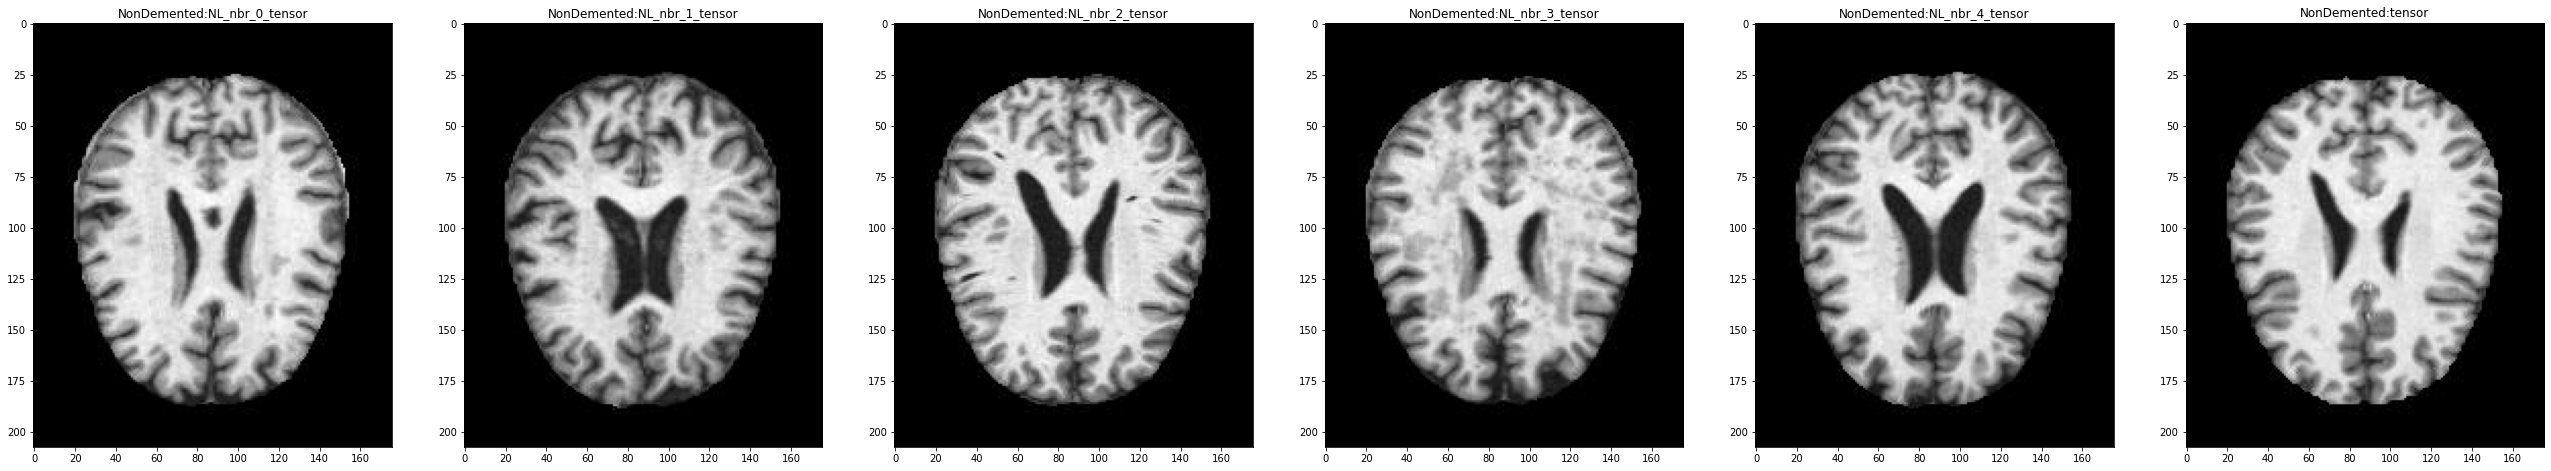

In [ ]:
'''plot parsed train_graph examples'''
label =  tf.argmax(data_sample[1], axis=0)
sample = data_sample[0]
img_index=0
plt.figure(figsize=(45,15))
for key, value in sample.items():
    if key.split('_')[-1]=='tensor':
        plt.subplot(1,max_seed_node_neighbours+1,img_index + 1)
        img_tensor = tf.reshape(value, shape=value.shape[1:])
        plt.imshow(img_tensor)
        plt.title(f'{label_list[label.numpy()[0]]}:{key}')
        img_index +=1

## Generate the test graph data with KMeans clusters

In [ ]:
'''merge test examples with the graph with clusters'''
test_tfr_path = f'{root_path}test_data_tsne.tfr'
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_tSNE_KMeans.tsv')
max_seed_node_neighbours = 5

nsl_test= NSLDataFormat(seed_dict_examples=test_examples, 
                        rem_dict_examples=train_examples, 
                        graph=graph, 
                        max_nbrs=max_seed_node_neighbours)
nsl_test.generate_node_nbrs_tfr(output_file_path=test_tfr_path)

In [ ]:
'''parse test_graph_examples'''
parsed_image_size=(208,176)
parsed_image_channel=3
batch=1
test_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[test_tfr_path],
                                                        batch_size=batch,
                                                        max_neighbor_number=max_seed_node_neighbours,
                                                        image_size=parsed_image_size,
                                                        image_channels=parsed_image_channel,
                                                        shuffle=True)
data_sample = iter(test_image_dataset).get_next()

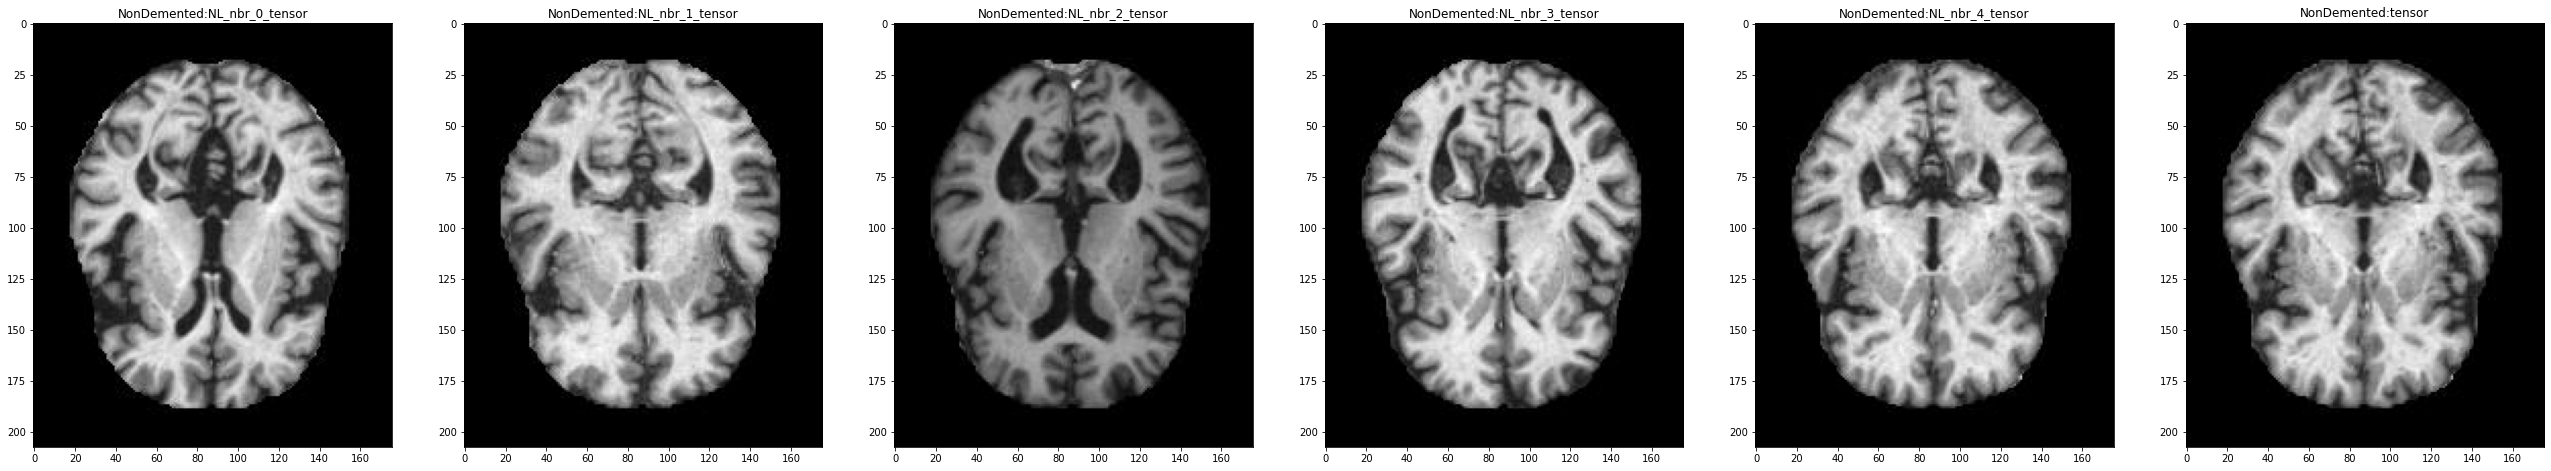

In [ ]:
'''plot parsed test_graph examples'''
label = tf.argmax(data_sample[1], axis=0)
sample = data_sample[0]
img_index=0
plt.figure(figsize=(45,15))
for key, value in sample.items():
    if key.split('_')[-1]=='tensor':
        plt.subplot(1,max_seed_node_neighbours+1,img_index + 1)
        img_tensor = tf.reshape(value, shape=value.shape[1:])
        plt.imshow(img_tensor)
        plt.title(f'{label_list[label.numpy()[0]]}:{key}')
        img_index +=1

#6.Train Base Model

In [ ]:
from AD_model_builder import AD_params, ADModelBuilder, AccEarlyStop

In [ ]:
'''define CNN base model'''

def build_base_model(): 
    ipt= tf.keras.Input(shape=(100,100,3), name='tensor')
    opt= tf.keras.layers.Conv2D(64, (3,3), padding='same', name='block1_conv1')(ipt)
    opt= tf.keras.layers.Conv2D(64, (3,3), padding='same', name='block1_conv2')(ipt)
    opt= tf.keras.layers.BatchNormalization(name='block1_BN')(opt)
    opt= tf.keras.layers.LeakyReLU(name='block1_lky_relu')(opt)
    opt= tf.keras.layers.Dropout(0.4)(opt)
    opt= tf.keras.layers.MaxPool2D((2,2), name='block1_pool')(opt)

    opt= tf.keras.layers.Conv2D(64, (3,3), padding='same', name='block2_conv1')(opt)
    opt= tf.keras.layers.Conv2D(64, (3,3), padding='same', name='block2_conv2')(opt)
    opt= tf.keras.layers.BatchNormalization(name='block2_BN')(opt)
    opt= tf.keras.layers.LeakyReLU(name='block2_lky_relu')(opt)
    opt= tf.keras.layers.Dropout(0.4)(opt)
    opt= tf.keras.layers.MaxPool2D((2,2), name='block2_pool')(opt)

    opt= tf.keras.layers.Conv2D(128, (3,3), padding='same', name='block3_conv1')(opt)
    opt= tf.keras.layers.BatchNormalization(name='block3_BN')(opt)
    opt= tf.keras.layers.LeakyReLU(name='block3_lky_relu')(opt)
    opt= tf.keras.layers.Dropout(0.4)(opt)
    opt= tf.keras.layers.MaxPool2D((2,2), name='block3_pool')(opt)
    
    opt= tf.keras.layers.Conv2D(128, (3,3), padding='same', name='block4_conv1')(opt)
    opt= tf.keras.layers.BatchNormalization(name='block4_BN')(opt)
    opt= tf.keras.layers.LeakyReLU(name='block4_lky_relu')(opt)
    opt= tf.keras.layers.Dropout(0.4)(opt)
    opt= tf.keras.layers.MaxPool2D((2,2), name='block4_pool')(opt)

    opt= tf.keras.layers.Flatten()(opt)
    opt= tf.keras.layers.Dense(128)(opt)
    opt= tf.keras.layers.BatchNormalization()(opt)
    opt= tf.keras.layers.LeakyReLU()(opt)
    opt= tf.keras.layers.Dropout(0.3)(opt)
    opt= tf.keras.layers.Dense(128)(opt)
    opt= tf.keras.layers.BatchNormalization()(opt)
    opt= tf.keras.layers.LeakyReLU()(opt)
    opt= tf.keras.layers.Dropout(0.3)(opt)
    opt= tf.keras.layers.Dense(64)(opt)
    opt= tf.keras.layers.BatchNormalization()(opt)
    opt= tf.keras.layers.LeakyReLU()(opt)
    opt= tf.keras.layers.Dropout(0.3)(opt)
    opt= tf.keras.layers.Dense(4, activation='softmax')(opt)
    
    base_model = tf.keras.Model(ipt,opt)
    return base_model

## Train base model with images

In [ ]:
'''load data for base_model training'''
parsed_image_size=(100,100)
parsed_image_channel=3
max_seed_node_neighbours = 5
batch= 128
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_tsne.tsv')
train_tfr_path = f'{root_path}train_data_tsne.tfr'
test_tfr_path = f'{root_path}test_data_tsne.tfr'

train_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[train_tfr_path],
                                                                         batch_size=batch,
                                                                         max_neighbor_number=max_seed_node_neighbours,
                                                                         image_size=parsed_image_size,
                                                                         image_channels=parsed_image_channel,
                                                                         shuffle=True)

test_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[test_tfr_path],
                                                                        batch_size=batch,
                                                                        max_neighbor_number=max_seed_node_neighbours,
                                                                        image_size=parsed_image_size,
                                                                        image_channels=parsed_image_channel,
                                                                        shuffle=True)

In [ ]:
'''train base model'''
base_model = build_base_model()
# CAC = tf.keras.metrics.CategoricalAccuracy(name='cac')
AUC = tf.keras.metrics.AUC(name='auc')
METRICS=[AUC]
base_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, amsgrad=True), 
                   loss=tf.losses.CategoricalCrossentropy(), 
                   metrics=METRICS)
history = base_model.fit(train_image_dataset,
                         validation_data=test_image_dataset,
                         callbacks = [ValAccEarlyStopping(val_acc_base=0.90)],
                         epochs=100,
                         verbose=1)

Epoch 1/100


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['NL_nbr_0_id', 'NL_nbr_0_tensor', 'NL_nbr_0_weight', 'NL_nbr_1_id', 'NL_nbr_1_tensor', 'NL_nbr_1_weight', 'NL_nbr_2_id', 'NL_nbr_2_tensor', 'NL_nbr_2_weight', 'NL_nbr_3_id', 'NL_nbr_3_tensor', 'NL_nbr_3_weight', 'NL_nbr_4_id', 'NL_nbr_4_tensor', 'NL_nbr_4_weight', 'id'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


36/36 [==============================] - 11s 299ms/step - loss: 1.7010 - auc: 0.5483 - val_loss: 1.4098 - val_auc: 0.4239
Epoch 2/100
36/36 [==============================] - 10s 278ms/step - loss: 1.5299 - auc: 0.6183 - val_loss: 1.4121 - val_auc: 0.4922
Epoch 3/100
36/36 [==============================] - 10s 278ms/step - loss: 1.5022 - auc: 0.6350 - val_loss: 1.3509 - val_auc: 0.7144
Epoch 4/100
36/36 [==============================] - 10s 280ms/step - loss: 1.4504 - auc: 0.6533 - val_loss: 1.2646 - val_auc: 0.7194
Epoch 5/100
36/36 [==============================] - 10s 279ms/step - loss: 1.4017 - auc: 0.6725 - val_loss: 1.2194 - val_auc: 0.7206
Epoch 6/100
36/36 [==============================] - 10s 279ms/step - loss: 1.3856 - auc: 0.6730 - val_loss: 1.1830 - val_auc: 0.7737
Epoch 7/100
36/36 [==============================] - 10s 281ms/step - loss: 1.3633 - auc: 0.6833 - val_loss: 1.1619 - val_auc: 0.7758
Epoch 8/100
36/36 [==============================] - 10s 280ms/step - loss

In [ ]:
results = base_model.evaluate(test_image_dataset)
print(results)

15/15 [==============================] - 3s 169ms/step - loss: 1.4997 - auc: 0.8052
[1.499721646308899, 0.8051758408546448]


## Train NSL model with image graphs without clusters

In [ ]:
'''load data wihtout clusters in the graph for NSL model'''
parsed_image_size=(100,100)
parsed_image_channel=3
max_seed_node_neighbours = 5
batch= 128
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_no_cluster.tsv')
train_tfr_path = f'{root_path}train_data.tfr'
test_tfr_path = f'{root_path}test_data.tfr'

train_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[train_tfr_path],
                                                                         batch_size=batch,
                                                                         max_neighbor_number=max_seed_node_neighbours,
                                                                         image_size=parsed_image_size,
                                                                         image_channels=parsed_image_channel,
                                                                         shuffle=True)

test_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[test_tfr_path],
                                                                        batch_size=batch,
                                                                        max_neighbor_number=max_seed_node_neighbours,
                                                                        image_size=parsed_image_size,
                                                                        image_channels=parsed_image_channel,
                                                                        shuffle=True)

In [ ]:
''' NSL model training wihtout clusters '''
base_model = build_base_model()
graph_reg_config = nsl.configs.make_graph_reg_config(neighbor_prefix="NL_nbr_",
                                                     neighbor_weight_suffix='_weight',
                                                     max_neighbors= 5,
                                                     multiplier= 0.1,
                                                     distance_type= nsl.configs.DistanceType.COSINE,
                                                     sum_over_axis=-1)
graph_reg_model = nsl.keras.GraphRegularization(base_model,graph_reg_config)

METRICS = [tf.keras.metrics.AUC(name='auc')]
graph_reg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, amsgrad=True), 
                        loss=tf.losses.CategoricalCrossentropy(), 
                        metrics=['accuracy', 'AUC',  tfa.metrics.F1Score(num_classes=4, average="micro", threshold = 0.5)])
                        
graph_reg_history = graph_reg_model.fit(train_image_dataset, 
                                        validation_data=test_image_dataset,
                                        callbacks = [AccEarlyStop(val_acc_base=0.9)],
                                        epochs=50,
                                        verbose=1)

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['id'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


     36/Unknown - 16s 454ms/step - loss: 1.7184 - accuracy: 0.3050 - auc: 0.5615 - f1_score: 0.2317 - scaled_graph_loss: 0.0351

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['NL_nbr_0_id', 'NL_nbr_0_tensor', 'NL_nbr_0_weight', 'NL_nbr_1_id', 'NL_nbr_1_tensor', 'NL_nbr_1_weight', 'NL_nbr_2_id', 'NL_nbr_2_tensor', 'NL_nbr_2_weight', 'NL_nbr_3_id', 'NL_nbr_3_tensor', 'NL_nbr_3_weight', 'NL_nbr_4_id', 'NL_nbr_4_tensor', 'NL_nbr_4_weight', 'id'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


36/36 [==============================] - 21s 584ms/step - loss: 1.7184 - accuracy: 0.3050 - auc: 0.5615 - f1_score: 0.2317 - scaled_graph_loss: 0.0351 - val_loss: 1.4299 - val_accuracy: 0.3545 - val_auc: 0.4755 - val_f1_score: 0.1819
Epoch 2/50
36/36 [==============================] - 20s 554ms/step - loss: 1.5620 - accuracy: 0.3786 - auc: 0.6324 - f1_score: 0.3185 - scaled_graph_loss: 0.0346 - val_loss: 1.2962 - val_accuracy: 0.3545 - val_auc: 0.6471 - val_f1_score: 0.0000e+00
Epoch 3/50
36/36 [==============================] - 20s 548ms/step - loss: 1.5032 - accuracy: 0.4009 - auc: 0.6526 - f1_score: 0.3382 - scaled_graph_loss: 0.0333 - val_loss: 1.1407 - val_accuracy: 0.5136 - val_auc: 0.8187 - val_f1_score: 0.0000e+00
Epoch 4/50
36/36 [==============================] - 20s 552ms/step - loss: 1.4276 - accuracy: 0.4311 - auc: 0.6799 - f1_score: 0.3625 - scaled_graph_loss: 0.0316 - val_loss: 1.1193 - val_accuracy: 0.5021 - val_auc: 0.8188 - val_f1_score: 0.5056
Epoch 5/50
36/36 [=====

In [ ]:
graph_reg_model.save_weights('/content/drive/My Drive/Projects/codes/graph_reg_model_weights_noClusters_1012')

In [ ]:
results = graph_reg_model.evaluate(test_image_dataset)
print(results)

15/15 [==============================] - 3s 227ms/step - loss: 1.0443 - accuracy: 0.5730 - auc: 0.8331 - f1_score: 0.5349
[1.0442652702331543, 0.5729926824569702, 0.8331339955329895, 0.5348771214485168]


## Train NSL model with image graphs with Kmeans clusters

In [ ]:
'''load data for NSL training with clusters'''
parsed_image_size=(100,100)
parsed_image_channel=3
max_seed_node_neighbours = 5
batch= 128
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_tsne.tsv')
train_tfr_path = f'{root_path}train_data_tsne.tfr'
test_tfr_path = f'{root_path}test_data_tsne.tfr'

train_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[train_tfr_path],
                                                                         batch_size=batch,
                                                                         max_neighbor_number=max_seed_node_neighbours,
                                                                         image_size=parsed_image_size,
                                                                         image_channels=parsed_image_channel,
                                                                         shuffle=True)

test_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[test_tfr_path],
                                                                        batch_size=batch,
                                                                        max_neighbor_number=max_seed_node_neighbours,
                                                                        image_size=parsed_image_size,
                                                                        image_channels=parsed_image_channel,
                                                                        shuffle=True)

In [ ]:
''' NSL training with clusters '''
base_model = build_base_model()

graph_reg_config = nsl.configs.make_graph_reg_config(
                                                     neighbor_prefix="NL_nbr_",
                                                     neighbor_weight_suffix='_weight',
                                                     max_neighbors= 5,
                                                     multiplier= 0.1,
                                                     distance_type= nsl.configs.DistanceType.COSINE,
                                                     sum_over_axis=-1)
graph_reg_model = nsl.keras.GraphRegularization(base_model,graph_reg_config)
graph_reg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, amsgrad=True), 
                        loss=tf.losses.CategoricalCrossentropy(), 
                        metrics=['accuracy', 'AUC',  tfa.metrics.F1Score(num_classes=4, average="micro", threshold = 0.5)])
                        
graph_reg_history = graph_reg_model.fit(train_image_dataset, 
                                        validation_data=test_image_dataset,
                                        callbacks = [AccEarlyStop(val_acc_base=0.9)],
                                        epochs=50,
                                        verbose=1)

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['id'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


     35/Unknown - 17s 474ms/step - loss: 1.8437 - accuracy: 0.2618 - auc: 0.5193 - f1_score: 0.1953 - scaled_graph_loss: 0.0351

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['NL_nbr_0_id', 'NL_nbr_0_tensor', 'NL_nbr_0_weight', 'NL_nbr_1_id', 'NL_nbr_1_tensor', 'NL_nbr_1_weight', 'NL_nbr_2_id', 'NL_nbr_2_tensor', 'NL_nbr_2_weight', 'NL_nbr_3_id', 'NL_nbr_3_tensor', 'NL_nbr_3_weight', 'NL_nbr_4_id', 'NL_nbr_4_tensor', 'NL_nbr_4_weight', 'id'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


36/36 [==============================] - 21s 582ms/step - loss: 1.8434 - accuracy: 0.2619 - auc: 0.5194 - f1_score: 0.1953 - scaled_graph_loss: 0.0346 - val_loss: 1.4675 - val_accuracy: 0.1350 - val_auc: 0.3960 - val_f1_score: 0.1534
Epoch 2/50
36/36 [==============================] - 20s 550ms/step - loss: 1.6462 - accuracy: 0.3472 - auc: 0.5994 - f1_score: 0.2911 - scaled_graph_loss: 0.0338 - val_loss: 1.4345 - val_accuracy: 0.1350 - val_auc: 0.4045 - val_f1_score: 0.0000e+00
Epoch 3/50
36/36 [==============================] - 20s 547ms/step - loss: 1.5865 - accuracy: 0.3753 - auc: 0.6251 - f1_score: 0.3096 - scaled_graph_loss: 0.0330 - val_loss: 1.2894 - val_accuracy: 0.3545 - val_auc: 0.6591 - val_f1_score: 0.0000e+00
Epoch 4/50
36/36 [==============================] - 20s 552ms/step - loss: 1.5242 - accuracy: 0.3884 - auc: 0.6442 - f1_score: 0.3323 - scaled_graph_loss: 0.0321 - val_loss: 1.1803 - val_accuracy: 0.5130 - val_auc: 0.8217 - val_f1_score: 0.0000e+00
Epoch 5/50
36/36 [=

In [ ]:
graph_reg_model.save_weights('/content/drive/My Drive/Projects/codes/graph_reg_model_weights_tsne_1012')

In [ ]:
results = graph_reg_model.evaluate(test_image_dataset)
print(results)

15/15 [==============================] - 3s 205ms/step - loss: 1.0529 - accuracy: 0.5574 - auc: 0.8296 - f1_score: 0.5218
[1.0529062747955322, 0.5573514103889465, 0.8295897841453552, 0.5217639803886414]


## Train NSL model with image graphs with Hierarchical clusters

In [ ]:
'''load data for NSL model'''
parsed_image_size=(100,100)
parsed_image_channel=3
max_seed_node_neighbours = 5
batch= 5
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_tSNE_hierarchy.tsv')
train_tfr_path = f'{root_path}train_data.tfr'
test_tfr_path = f'{root_path}test_data.tfr'

train_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[train_tfr_path],
                                                                         batch_size=batch,
                                                                         max_neighbor_number=max_seed_node_neighbours,
                                                                         image_size=parsed_image_size,
                                                                         image_channels=parsed_image_channel,
                                                                         shuffle=True)

test_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[test_tfr_path],
                                                                        batch_size=batch,
                                                                        max_neighbor_number=max_seed_node_neighbours,
                                                                        image_size=parsed_image_size,
                                                                        image_channels=parsed_image_channel,
                                                                        shuffle=True)

In [ ]:
base_model = build_base_model()
graph_reg_config = nsl.configs.make_graph_reg_config(neighbor_prefix="NL_nbr_",
                                                     neighbor_weight_suffix='_weight',
                                                     max_neighbors= 5,
                                                     multiplier= 0.1,
                                                     distance_type= nsl.configs.DistanceType.COSINE,
                                                     sum_over_axis=-1)
graph_reg_model = nsl.keras.GraphRegularization(base_model,graph_reg_config)

METRICS = [tf.keras.metrics.AUC(name='auc')]
graph_reg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, amsgrad=True), 
                        loss=tf.losses.CategoricalCrossentropy(), 
                        metrics=['accuracy', 'AUC',  tfa.metrics.F1Score(num_classes=4, average="micro", threshold = 0.5)])
                        
graph_reg_history = graph_reg_model.fit(train_image_dataset, 
                                        validation_data=test_image_dataset,
                                        callbacks = [AccEarlyStop(val_acc_base=0.9)],
                                        epochs=50,
                                        verbose=1)

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['id'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


    896/Unknown - 32s 36ms/step - loss: 1.4922 - accuracy: 0.3609 - auc: 0.6403 - f1_score: 0.2896 - scaled_graph_loss: 0.0298

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['NL_nbr_0_id', 'NL_nbr_0_tensor', 'NL_nbr_0_weight', 'NL_nbr_1_id', 'NL_nbr_1_tensor', 'NL_nbr_1_weight', 'NL_nbr_2_id', 'NL_nbr_2_tensor', 'NL_nbr_2_weight', 'NL_nbr_3_id', 'NL_nbr_3_tensor', 'NL_nbr_3_weight', 'NL_nbr_4_id', 'NL_nbr_4_tensor', 'NL_nbr_4_weight', 'id'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


897/897 [==============================] - 38s 42ms/step - loss: 1.4917 - accuracy: 0.3612 - auc: 0.6405 - f1_score: 0.2900 - scaled_graph_loss: 0.0298 - val_loss: 1.0239 - val_accuracy: 0.5527 - val_auc: 0.8339 - val_f1_score: 0.2758
Epoch 2/50
897/897 [==============================] - 37s 41ms/step - loss: 1.1996 - accuracy: 0.4701 - auc: 0.7549 - f1_score: 0.4137 - scaled_graph_loss: 0.0225 - val_loss: 0.9961 - val_accuracy: 0.5308 - val_auc: 0.8180 - val_f1_score: 0.4631
Epoch 3/50
897/897 [==============================] - 37s 41ms/step - loss: 1.1330 - accuracy: 0.4902 - auc: 0.7782 - f1_score: 0.4358 - scaled_graph_loss: 0.0185 - val_loss: 1.0141 - val_accuracy: 0.5355 - val_auc: 0.8294 - val_f1_score: 0.5092
Epoch 4/50
897/897 [==============================] - 37s 41ms/step - loss: 1.0590 - accuracy: 0.5125 - auc: 0.8021 - f1_score: 0.4673 - scaled_graph_loss: 0.0164 - val_loss: 1.1372 - val_accuracy: 0.5021 - val_auc: 0.8234 - val_f1_score: 0.5023
Epoch 5/50
897/897 [=======

In [ ]:
graph_reg_model.save_weights('/content/drive/My Drive/Projects/codes/graph_reg_model_weights_1012')

In [ ]:
results = graph_reg_model.evaluate(test_image_dataset)
print(results)

384/384 [==============================] - 5s 14ms/step - loss: 1.0661 - accuracy: 0.5845 - auc: 0.8456 - f1_score: 0.5475
[1.0660516023635864, 0.5844630002975464, 0.8455942869186401, 0.5474956035614014]
